<a href="https://colab.research.google.com/github/Mikhail-Klochkov/AutoMLBinaryClassifications/blob/main/Analytics_Test_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegressionCV


In [66]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

Цель этого задания - проверить, как вы мыслите в области анализа данных, поэтому, пожалуйста, поясняйте текстом каждый шаг вашего решения. В пояснении к каждому шагу должно быть ясно, что и почему вы делаете.

# Задача 1

Представим, что вы реформируете школьное образование в России и думаете о том, стоит ли строить много маленьких школ или немного больших. Для того, чтобы ответить на этот вопрос, вы решили обратиться к данным и проверить, как зависит средний балл ЕГЭ выпускного класса от его размера. Данные лежат в файле school_stats.csv. Также пусть размеры выпускных классов варьируются от 10 до 200 человек (то есть классы "A", "Б", первая/вторая смена схлопываются в этой статистике в один класс).

Какой вывод о влиянии размера школы на средние баллы ЕГЭ вы можете сделать, основываясь на данных? 

In [46]:
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/DB/school_stats.csv", sep=";")
columns = data.columns
data = data.rename(columns = {columns[0]: "size"})

data.describe()

,size,GPA
count,10000.000000,10000.000000
mean,104.442100,64.988693
std,54.903986,1.522066
min,10.000000,54.841785
25%,57.000000,64.152781
50%,104.000000,64.989151
75%,152.000000,65.826307
max,199.000000,75.187781


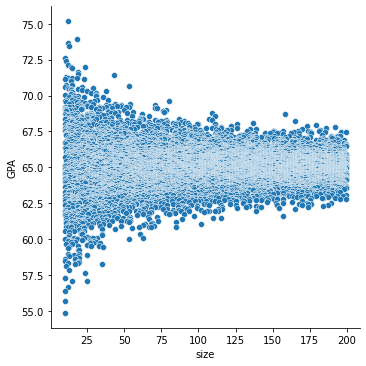

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
#fig, axs = plt.subplots(figsize=(15, 15))
sns.relplot(x = data['size'], y = data.GPA)


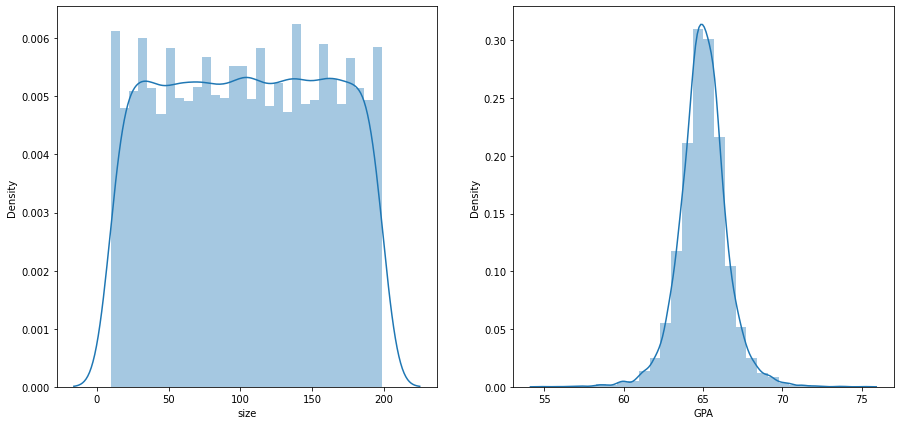

In [67]:

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.distplot(a = data['size'], hist = True
             , bins = 30, ax = ax[0])
sns.distplot(a = data['GPA'], hist = True
             , bins = 30, ax = ax[1])


Необходмо для разных разбиений нашей выборки на маленькие классы и на большие классы (Очевидно нам никто не сказал как их разбить). Пусть мы определим критерий по которому мы будем считать класс маленьким или большим (довольно грубо, но разумно) $X_{s} = \{x \in X_{data} | x_{size} < t_{1}\}$, $X_{b} = \{x \in X_{data} | x_{size} > t_{2}\} \;\; t_{1} \in [10, 80] \; t_{2} \in [150, 200]$.  - кажется разумным брать такие разбиения. Ну или те для которых сгруппированные данные по признаку GPA образуют нормальное распределение в соответствии с тестом.

Теперь судя по графику видно, что распределение оценок $x_{GPA}$ очень похоже на нормальное. Но надо для проверки использовать критерий нормальности, например на основе ассиметрии и эксцесса.



In [85]:
from scipy import stats

diap = (20, 190)
step = 5
history = []
alpha_normal = 0.1
alpha_means = 0.05

times_right = 0
times_normal_distr = 0

for treshold in range(20, 191, 10):
  datasmaller = data[data['size'] <= treshold]
  databigger = data[data['size'] > treshold]
  # -- check normall test -- #
  k2_group1, p_group1 = stats.normaltest(datasmaller['GPA'].values)
  k2_group2, p_group2 = stats.normaltest(databigger['GPA'].values)
  if(p_group1 < alpha_normal and p_group2 < alpha_normal):
    times_normal_distr += 1
    print('comes from normal distribution')
    print('treshold: {}'.format(treshold))
    # -- check -- #
    n1 = datasmaller.shape[0]
    n2 = databigger.shape[0]
    gpa1, gpa2 = datasmaller['GPA'], databigger['GPA']
    K = (gpa1.mean() - gpa2.mean())/np.sqrt(gpa1.std()/n1 + gpa2.std()/n2)
    quantile1 = stats.norm.ppf(1 - alpha_means/2)
    quantile2 = -quantile1
    print(quantile1, quantile2)
    if(K > quantile1 or K < quantile2):
      # -- отвергаем гипотезу на уровне занчимости alpha_means = 0.05 -- #
      # -- mean1 != mean2 -- #
      pass
    else:
      # -- mean1 == mean2 -- #
      # -- Хотя по идее мы ничего не можем точно сказать -- #
      print('m1 == m2')
      times_right += 1


print("times situations where distributions is normal : {}\times situations where means of GPA is equal: {}".format(times_normal_distr,
                                                                                                                    times_right))

if(times_normal_distr == times_right):
  print('Гипотеза о том, что средние оценки у людей, которые учаться в больших школах и маленьких равны подтверждается на уровне значимости alpha: {}'.format(alpha_means)) 

comes from normal distribution
treshold: 40
1.959963984540054 -1.959963984540054
m1 == m2
comes from normal distribution
treshold: 50
1.959963984540054 -1.959963984540054
m1 == m2
comes from normal distribution
treshold: 60
1.959963984540054 -1.959963984540054
m1 == m2
comes from normal distribution
treshold: 70
1.959963984540054 -1.959963984540054
m1 == m2
comes from normal distribution
treshold: 80
1.959963984540054 -1.959963984540054
m1 == m2
comes from normal distribution
treshold: 150
1.959963984540054 -1.959963984540054
m1 == m2
comes from normal distribution
treshold: 180
1.959963984540054 -1.959963984540054
m1 == m2
comes from normal distribution
treshold: 190
1.959963984540054 -1.959963984540054
m1 == m2
times situations where distributions is normal : 8	imes situations where means of GPA is equal: 8
Гипотеза о том, что средние оценки у людей, которые учаться в больших школах и маленьких равны подтверждается на уровне значимости alpha: 0.05


# Задача 2

Ниже дан код, строящий простой классификатор. Постройте 95% доверительный интервал accuracy классификатора на обучающей выборке.

In [24]:
X_train, y_train = make_classification(10000)
model = LogisticRegressionCV()
model.fit(X_train, y_train);
accuracy_score(model.predict(X_train), y_train)

0.9107

In [30]:
# --  Stratified Shuffle split -- #
# -- Shuffle Split -- # 
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

class LogisticRegressionCVMy(BaseEstimator, ClassifierMixin):

  def __init__(self, Cs :int = 10, 
               cv :int = 5,
               penalty : str = 'l2',
               scorer = accuracy_score,
               class_weight = None, 
               verbose = 0):
    super().__init__()
    self._Cs = Cs
    self._cv = cv
    self._penalty = penalty
    # -- function (ground_truth, predicted) -- #
    self._scorer = scorer
    # -- shold be logisticRegression -- #
    self._cls = None
    self._class_weight = class_weight
    self._verbose = verbose

  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    # -- Grid Search for hyperparameter C - regularization for l2 -- #
    grid_C = np.logspace(-4, 4, self._Cs)
    test_scores = []
    train_scores = []
    for idx, C in enumerate(grid_C):
      sss = StratifiedKFold(n_splits = self._cv, 
                            shuffle = True,
                            random_state = 34)
      test_score = 0
      train_score = 0
      for tr_ind, ts_ind in sss.split(X, y):
        X_tr, X_ts = X[tr_ind], X[ts_ind]
        y_tr, y_ts = y[tr_ind], y[ts_ind]
        logreg = LogisticRegression(C = C, 
                                    penalty = self._penalty,
                                    class_weight = self._class_weight)
        logreg.fit(X_tr, y_tr)
        preds = logreg.predict(X_ts)
        preds_tr = logreg.predict(X_tr)
        test_score += self._scorer(y_ts, preds)
        train_score += self._scorer(y_tr, preds_tr)

      
      if(self._verbose):
        print('train score on cv {} : {:.3f}'.format(self._cv, train_score / self._cv))
        print('test score on cv {} : {:.3f}'.format(self._cv, test_score / self._cv))
        print("-"*30)

      test_scores.append(test_score / self._cv)
      train_scores.append(train_score / self._cv)

    # -- we need find maximum -- #
    test_scores = np.asarray(test_scores)
    train_scores = np.asarray(train_scores)
    thebestC = grid_C[test_scores.argmax()]
    # -- define the best parameter C -- #
    self._cls = LogisticRegression(C = thebestC,
                                   penalty = self._penalty, 
                                   class_weight = self._class_weight)
    # -- fit on the best hyperparameter -- #
    self._cls.fit(X, y)
    return None
  
  def predict(self, X : np.ndarray) -> np.ndarray:
    if(self._cls):
      return self._cls.predict(X)
    else:
      print("Shold be execute fit before!")
      return None

  def predict_proba(self, X : np.ndarray) -> np.ndarray:
    if(self._cls):
      return self._cls.predict_proba(X)
    else:
      print("Shold be execute fit before!")
      return None
    

logregcv = LogisticRegressionCVMy(verbose = 1,
                                  class_weight = "balanced")
logregcv.fit(X_train, y_train)
print("accuracy score: {:.3f}".format(accuracy_score(logregcv.predict(X_train), y_train)))


train score on cv 5 : 0.909
test score on cv 5 : 0.908
------------------------------
train score on cv 5 : 0.911
test score on cv 5 : 0.910
------------------------------
train score on cv 5 : 0.911
test score on cv 5 : 0.910
------------------------------
train score on cv 5 : 0.911
test score on cv 5 : 0.910
------------------------------
train score on cv 5 : 0.911
test score on cv 5 : 0.910
------------------------------
train score on cv 5 : 0.911
test score on cv 5 : 0.910
------------------------------
train score on cv 5 : 0.911
test score on cv 5 : 0.910
------------------------------
train score on cv 5 : 0.911
test score on cv 5 : 0.910
------------------------------
train score on cv 5 : 0.911
test score on cv 5 : 0.910
------------------------------
train score on cv 5 : 0.911
test score on cv 5 : 0.910
------------------------------
accuracy score: 0.911


In [41]:
def findDoVIntv(cls, X : np.ndarray, y :np.ndarray, 
                alpha: float = 0.95,
                N : int = 50, 
                random_state = 34):
  
  """
  returns mean - accuracy
  tupel - intarval
  """
  test_size = 0.3
  sss = StratifiedShuffleSplit(n_splits = 50, 
                       test_size = test_size,
                       random_state = 34)

  accuracy_arr = []
  alp = 1 - alpha
  
  for tr_idx, ts_idx in sss.split(X, y):
    X_tr, X_ts = X[tr_idx], X[ts_idx]
    y_tr, y_ts = y[tr_idx], y[ts_idx]
    cls_current = cls()
    cls_current.fit(X_tr, y_tr)
    acc = accuracy_score(cls_current.predict(X_ts), y_ts)
    accuracy_arr.append(acc)

  accuracy_arr = np.asarray(accuracy_arr)
  qleft = np.percentile(accuracy_arr, q = 100 * (alp / 2))
  qright = np.percentile(accuracy_arr, q = 100 * (1 - alp / 2))

  mean_acc = np.mean(accuracy_arr)
  print('mean: {:.3f}'.format(mean_acc))
  print('interval := ({:.4f} <= {:.4f} <= {:.4f})'.format(qleft, mean_acc, qright))

  return mean_acc, (qleft, qright)

print('for only logisticregression:')
mean_lg1, pair1 = findDoVIntv(LogisticRegression, X_train, y_train)
print('-'*50)

print('for logisticregressionCV sklearn implementation:')
mean_lg2, pair2 = findDoVIntv(LogisticRegressionCV, X_train, y_train)
print('-'*50)

print('for logisticregressionCV my implementation:')
mean_lg2, pair2 = findDoVIntv(LogisticRegressionCVMy, X_train, y_train)
print('-'*50)

for only logisticregression:
mean: 0.910
interval := (0.9021 <= 0.9097 <= 0.9173)
--------------------------------------------------
for logisticregressionCV sklearn implementation:
mean: 0.910
interval := (0.9042 <= 0.9100 <= 0.9159)
--------------------------------------------------
for only logisticregressionCV my implementation:
mean: 0.910
interval := (0.9025 <= 0.9099 <= 0.9159)
--------------------------------------------------


# Задача 3

Пусть вы проводите клиническое испытание и вам необходимо выяснить есть ли корреляция между некоторыми факторами A и B. Вы обследовали 40 человек и записали данные в таблицу task3_data.csv. В колонках записано следующее: Factor A - измерения фактора A; Factor B - измерения фактора B; is_women - индикатор того, является ли пациент женщиной.  

Используя данные из  task3_data.csv выясните, есть ли корреляция между факторами A и B?

In [90]:
data_another = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/DB/task3_data.csv", sep=";")
(data_another.is_women == 0).sum()

20

Половина женщин и мужчин.

In [93]:
cols = data_another.columns
data_another = data_another.rename(columns = {cols[0]: 'A', cols[1]: 'B'})

In [143]:
def corr(x, y):
  dx = x - x.mean()
  dy = x - y.mean()

  return np.dot(dx, dy)/(np.sqrt((dx ** 2).sum()) * np.sqrt((dy ** 2).sum()))
A, B = data_another.A.values, data_another.B.values
# -- #
print("simple: {}".format(corr(A, B)))
# -- by group --  #
mask = (data_another.is_women == 1)
# -- 1 -- #
A1 = data_another[mask].A.values
B1 = data_another[mask].B.values
print("for woman : {}".format(corr(A1, B1)))

# -- 0 -- #
A2 = data_another[~mask].A.values
B2 = data_another[~mask].B.values
print("for man: {}".format(corr(A2, B2)))


simple: 0.8987929513204036
for woman : 0.9886812175181774
for man: 0.29013896373687076


In [146]:
# -- T criterion of pearson -- #
# -- before we Standart scaling -- #

a1_std = StandardScaler().fit_transform(A1.reshape((A1.shape[0], 1))).squeeze()
a2_std = StandardScaler().fit_transform(A2.reshape((A2.shape[0], 1))).squeeze()

b1_std = StandardScaler().fit_transform(B1.reshape((B1.shape[0], 1))).squeeze()
b2_std = StandardScaler().fit_transform(B2.reshape((B2.shape[0], 1))).squeeze()

a_std = StandardScaler().fit_transform(A.reshape((A.shape[0], 1))).squeeze()
b_std = StandardScaler().fit_transform(B.reshape((B.shape[0], 1))).squeeze()

# -- #
alpha = 0.05
data = [(a1_std, b1_std),(a2_std, b2_std),(a_std, b_std)]
data_not_std = [(A1, B1),(A2, B2),(A, B)]
# -- когда не надо стандартизировать -- #
flag = False
if(not flag):
  data = data_not_std

list_names = [('A1', 'B1'), ('A2', 'B2'), ('A', 'B')]
for idx in range(3):
  n_current = data[idx][0].shape[0]
  corr_emp = corr(data[idx][0], data[idx][1])
  quantile = stats.t.ppf(q = 1 - alpha/2, df = n_current - 2)
  statistica = np.sqrt(n_current - 2) * corr_emp/np.sqrt(1 - corr_emp ** 2) 
  print(np.abs(statistica), quantile, corr_emp)
  if(np.fabs(statistica) >= quantile):
    # -- correlation not zero -- #
    # -- with alpha = 0.05 -- #
    print("Отвергаем гипотезу о нулевом значении корреляции между признаками: {} и {}".format(list_names[idx][0],
                                                                                         list_names[idx][1]))
  else:
    # -- Мы не можем отвергнуть гипотезу, по идее результат статистически не значим -- #
    print("Не можем отвергнуть гипотезу о нулевом значении корреляции между признаками: {} и {} результат статистически не значим".format(list_names[idx][0],
                                                                                         list_names[idx][1]))

27.958257037179617 2.10092204024096 0.9886812175181774
Отвергаем гипотезу о нулевом значении корреляции между признаками: A1 и B1
1.2862855562306932 2.10092204024096 0.29013896373687076
Не можем отвергнуть гипотезу о нулевом значении корреляции между признаками: A2 и B2 результат статистически не значим
12.638841586329828 2.024394164575136 0.8987929513204036
Отвергаем гипотезу о нулевом значении корреляции между признаками: A и B


Текущий вывод состоит в том, что по мужчинам низкая корреляция. А по женщинам высокая практически 1. Как нам на основе небольшой выборке сделать какое-то утверждение относительно высокой коррелированности или слабой коррелированности? 

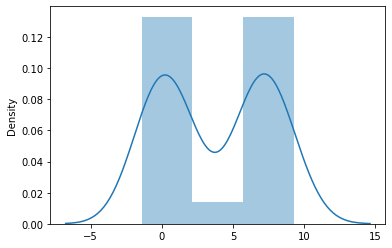

In [121]:
# -- Какие выборки -- #
sns.distplot(A)

In [133]:
from sklearn.preprocessing import StandardScaler

In [131]:
_, pa1 = stats.normaltest(StandardScaler().fit_transform(A1.reshape((A1.shape[0], 1))))
_, pa2 = stats.normaltest(StandardScaler().fit_transform(A2.reshape((A2.shape[0], 1))))
_, pb1 = stats.normaltest(StandardScaler().fit_transform(B1.reshape((B1.shape[0], 1))))
_, pb2 = stats.normaltest(StandardScaler().fit_transform(B2.reshape((B2.shape[0], 1))))

_, pa = stats.normaltest(StandardScaler().fit_transform(A.reshape((A.shape[0], 1))))
_, pb = stats.normaltest(StandardScaler().fit_transform(B.reshape((B.shape[0], 1))))


In [132]:
pa1, pa2, pb1, pb2, pa, pb

(array([0.33461807]),
 array([0.38583471]),
 array([0.59609858]),
 array([0.7240443]),
 array([1.36239027e-15]),
 array([0.00976955]))